# Homework Classic Machine Learning (50 points)

In this Homework, we will try to classify observations of space to be either stars, galaxies or quasars based on the RD14 from the Sloan Digital Sky Survey  (SDSS). The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested. 

http://www.sdss.org/
![alt text](http://www.fingerprintdigitalmedia.com/wp-content/uploads/2014/08/sdss1.jpg)

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.


In this homework we will train several classifier to predict the class of a celestial object based on the observations (features). We will practice data prep, dimensionality reduction, model design and training, model comparison, and feature importance selection.

### Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


## 1. Data Preparation (20 points)

We follow the following steps:
* read (1 point)
* clean (3 points)
* correlate (4 points)
* explore, spread of values (3 points)
* dimensionality reduction (9 points)


In [76]:
!wget "https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018 6_51_39 PM.csv"

--2024-11-11 21:32:57--  https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018%206_51_39%20PM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1377602 (1.3M) [text/plain]
Saving to: ‘Skyserver_SQL2_27_2018 6_51_39 PM.csv.2’

Skyserver_SQL2_27_2 100%[===================>]   1.31M  7.12MB/s    in 0.2s    

2024-11-11 21:32:57 (7.12 MB/s) - ‘Skyserver_SQL2_27_2018 6_51_39 PM.csv.2’ saved [1377602/1377602]




### 1.1 Data read
Read the pandas fata frame from the csv file "Skyserver_SQL2_27_2018 6_51_39 PM.csv" and skip the first row.

**Task: read pandas data frame (1 point)**

Save a copy of the data frame just in case.

In [77]:
# Read the CSV file, skipping the first row
df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv", skiprows=1, header=None)

#Save a copy of the DataFrame
df_copy = df.copy()

# Assign column names based on the expected structure of the Skyserver data
df.columns = ['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid']

**Description of the data fields**

* objid = Object Identifier, self explanatory.
* ra = J2000 Right Ascension (r-band). Angular that is measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.   https://en.wikipedia.org/wiki/Right_ascension
* dec = J2000 Declination (r-band). Angle that is measured north or south of the celestial equator, along the hour circle passing through the point in question. https://en.wikipedia.org/wiki/Declination



The Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further Information: http://astroweb.case.edu/ssm/ASTR620/mags.html 
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit




Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. 
* run = Run Number, which identifies the specific scan. 
* rereun = Rerun Number, which specifies how the image was processed.
* camcol = Camera column, a number from 1 to 6, identifying the scanline within the run.
* field = Field number, which typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object): The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift: In physics, **redshift** happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. 

* plate = plate number: Each spectroscopic exposure employs a large, thin, circular metal **plate** that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

* mjd = MJD of observation, **Modified Julian Date**, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
* fiberid = fiber ID. The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding **fiberID**. 

**Further information on SDSS images and their attributes:** 

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

### 1.2 Data Cleaning 

Basic stats about our dataset. 

**Task: Provide basic infor for the pandas dataframe head (0.5 point)**

In [78]:
# Display the first several rows of df
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


**Task: Find the data types of the database (floats, string, etc etc) using the ``info()`` function (0.5 point).**

In [79]:
# Find the data types of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Are there any obvious feature (or element of the dataframe) that should not impact our prediction?
Answer: 
**run**,**rerun**, **camcol**, **field**: These columns describe technical aspects of the data collection process and do not contain information about the astronomical objects' physical properties.
**plate**, **mjd**, **fiberid**: These features provide information about when and how the spectroscopic data was collected, but they do not directly relate to the object's classification.

**objid** and **specobjid** are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.
The features **run**, **rerun**, **camcol** and **field** are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

Source: http://www.sdss3.org/dr9/imaging/imaging_basics.php

**Task: Drop these columns in the pandas dataframe. (1 point)**

In [80]:
# List of columns to drop
columns_to_drop = ['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid']
df = df.drop(columns=columns_to_drop) # Drop the columns

In [81]:
display(df)

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590
...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,GALAXY,0.027583
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,GALAXY,0.117772
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,STAR,-0.000402
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,GALAXY,0.014019


Find our how many examples there are, how many attributes or feature, and the type of class.

In [82]:
num_examples, num_features = df.shape

class_types = df['class'].unique()

print(f"Number of examples: {num_examples}")

print(f"Number of features: {num_features}")

print(f"Class types: {class_types}")

Number of examples: 10000
Number of features: 9
Class types: ['STAR' 'GALAXY' 'QSO']


**Task: How many objects are in each class? (1 point)**

In [83]:
print("\nCount of objects in each class:")
print(df['class'].value_counts())


Count of objects in each class:
GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


The classes are "GALAXY", "STAR", and "QSO" (quasars). They are defined as strings, but we will convert them to integer in order to apply a loss function on the class labels during training. For this, we use the ``sklearn.preprocessing.LabelEncoder()`` function. We will do so and modify the classes in the dataframe. We should keep a copy of the original data frame to be safe.

### 1.3 Data correlations
Now let's find the most basic correlations among features. This can be done using the ``corr()`` function to apply on the pandas dataframe. Evaluate this function and comment on what feature is correlated among others. It is convenient to use the matplotlib function ``matshow()`` for clarity. ``seaborn`` is a python module that makes really pretty statistical plots https://seaborn.pydata.org/index.html#. Install it with ``pip`` and import it.

In [84]:
import seaborn as sns # Import seaborn

**Task: Plot the correlation matrix that can be called in the pandas dataframe. (2 points)**

Hints:

Use functions of ``heatmap``, add the labels in the axes. The colormap ``coolwarm`` is nice for divergent scales like correlations that vary between -1 and 1. The argument ``center=0`` ensures that the colormap is divergent from zero. Make sure to ignore the label column "class". Remember that dropping a column can be done in place ``sdss_df.drop('class', axis=1)``.

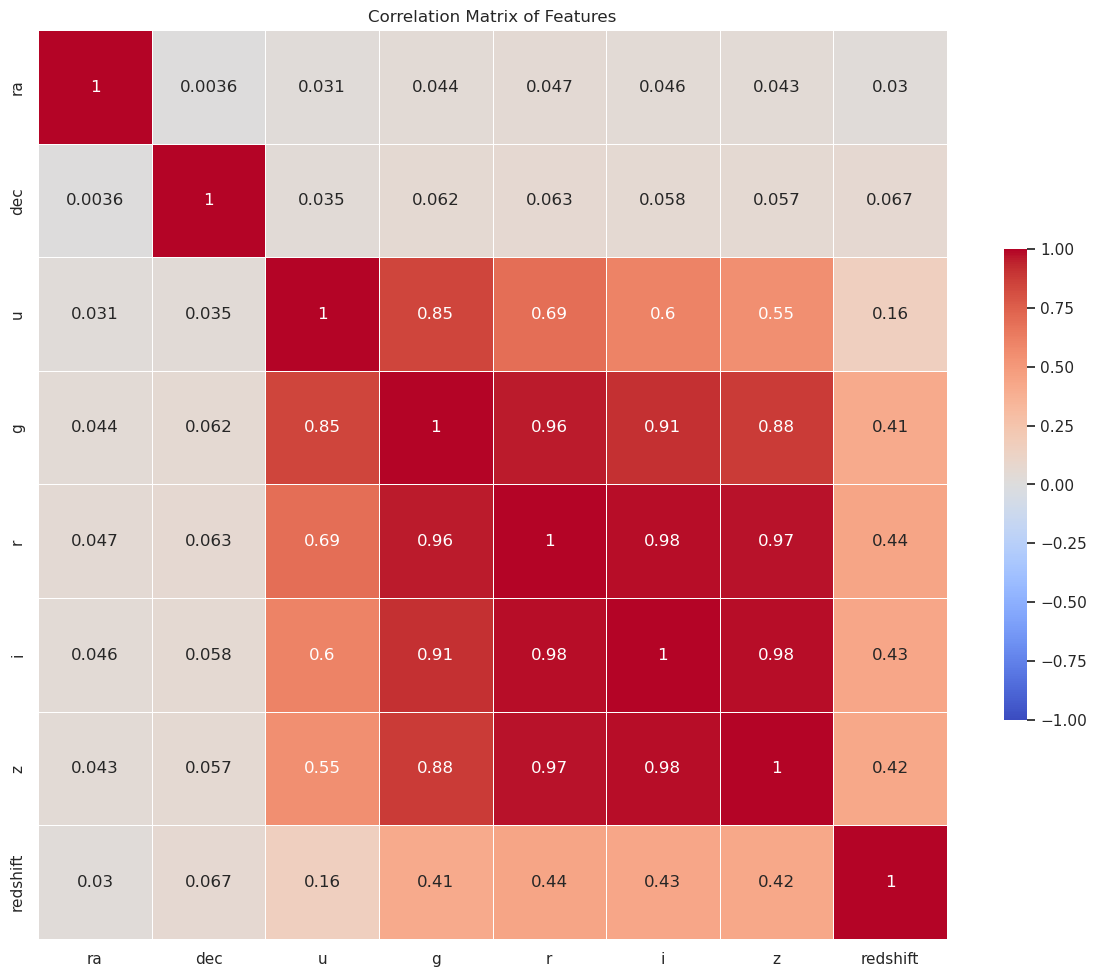

In [85]:
# Drop the 'class' column
df_numeric = df.drop('class', axis=1)

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.rcParams['font.family'] = 'DejaVu Sans' # Set the font family
plt.figure(figsize=(12, 10))    
sns.heatmap(correlation_matrix, 
            annot=True,  # Add numeric values to cells
            cmap='coolwarm',  # Use the coolwarm colormap
            vmin=-1, vmax=1,  # Set the range of values
            center=0,  # Ensure the colormap is centered at zero
            square=True,  # Make sure the cells are square
            linewidths=.5,  # Add lines between cells
            cbar_kws={"shrink": .5})  # Adjust the size of the colorbar
plt.title('Correlation Matrix of Features') 

plt.tight_layout()
plt.show()

**Task: Reproduce the same plot for each of the three classes. (1 point)**
You can select the values from the pandas dataframe by selecting over the column 'class'. 

In [86]:
# Create a DataFrame for each class
star_df = df[df['class'] == 'STAR']
galaxy_df = df[df['class'] == 'GALAXY']
qso_df = df[df['class'] == 'QSO']

# Calculate the correlation matrices for each class
star_correlation_matrix = star_df.drop('class', axis=1).corr()
galaxy_correlation_matrix = galaxy_df.drop('class', axis=1).corr()
qso_correlation_matrix = qso_df.drop('class', axis=1).corr()

In [87]:
# Create a function for plotting heatmap of a given correlation matrix
def plot_correlation_heatmap(correlation_matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                vmin=-1, vmax=1, 
                center=0, 
                square=True, 
                linewidths=.5, 
                cbar_kws={"shrink": .5})
    plt.title(title, fontsize=16)

    plt.tight_layout()
    plt.show()

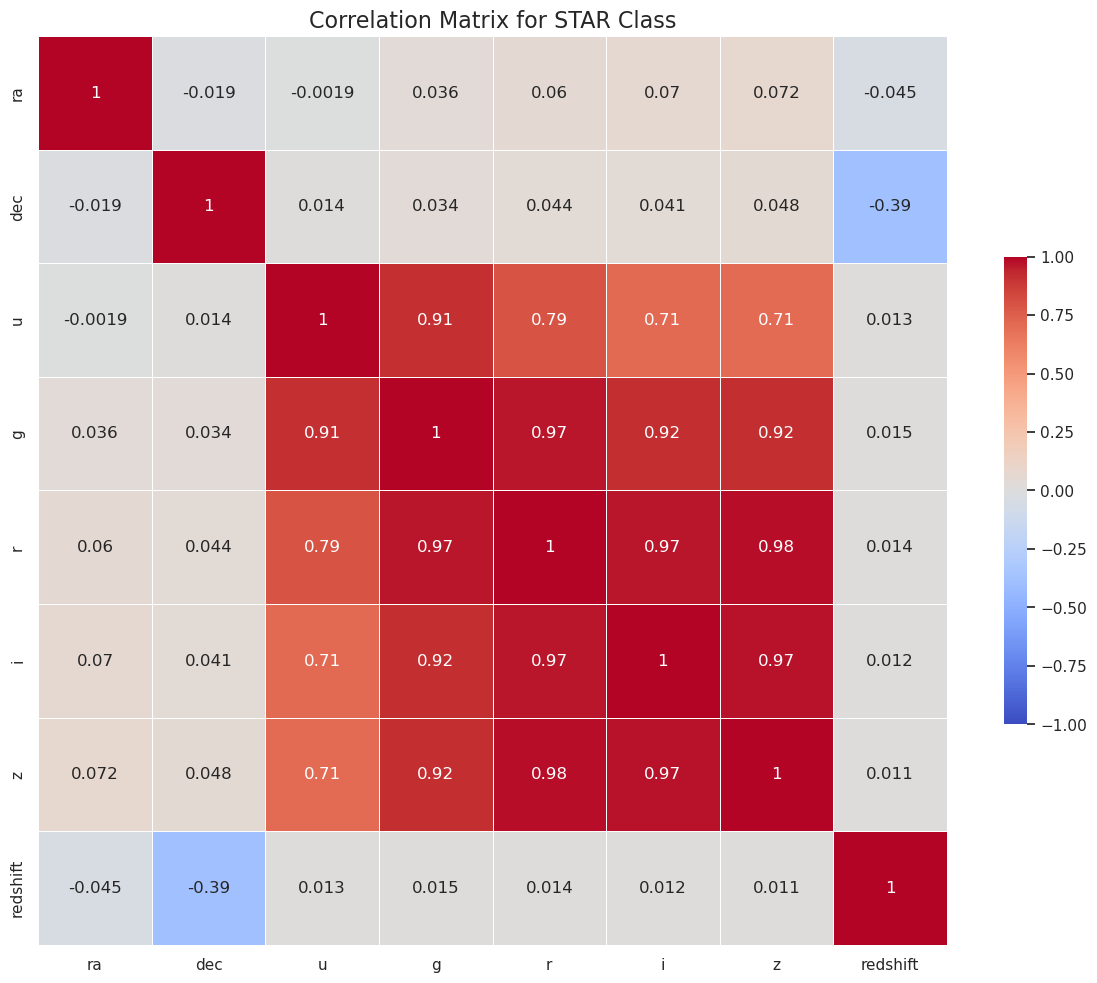

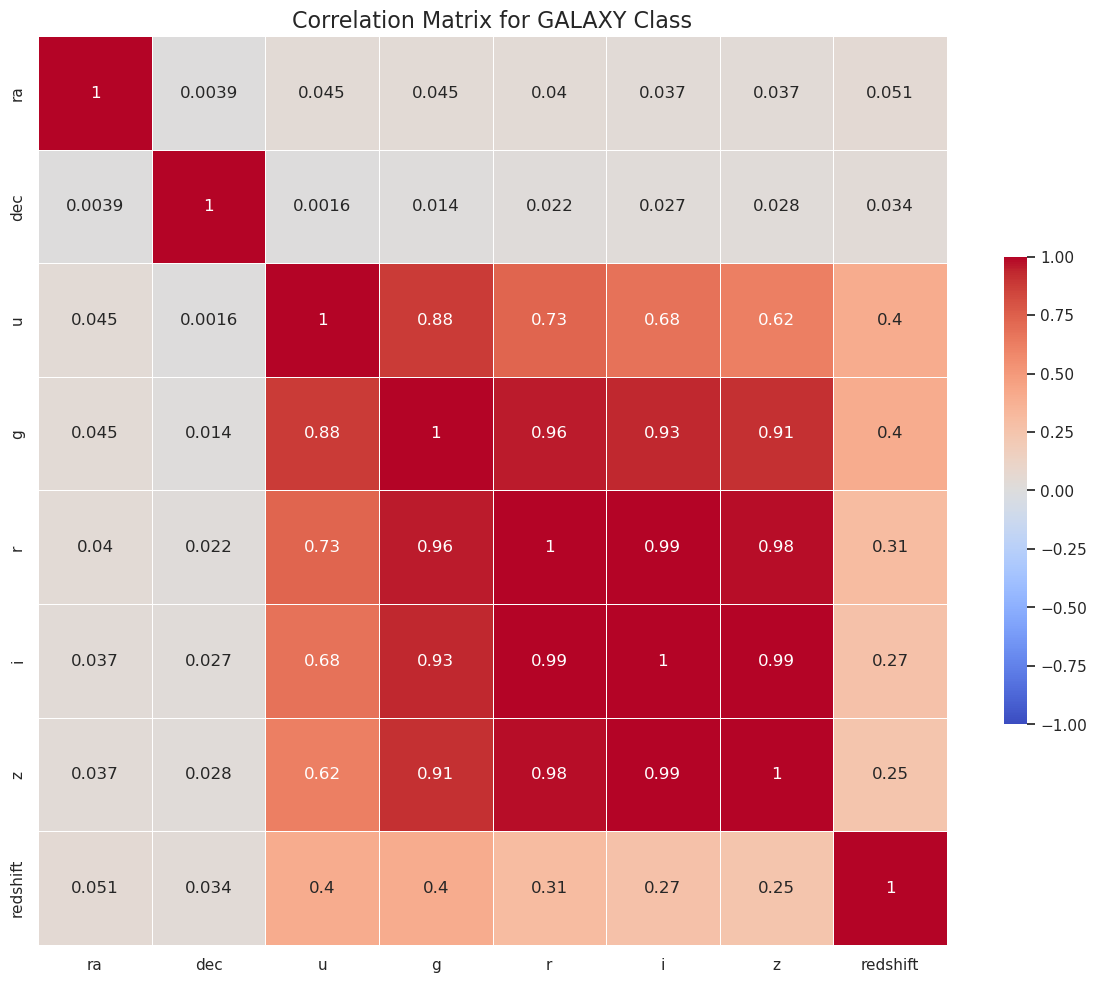

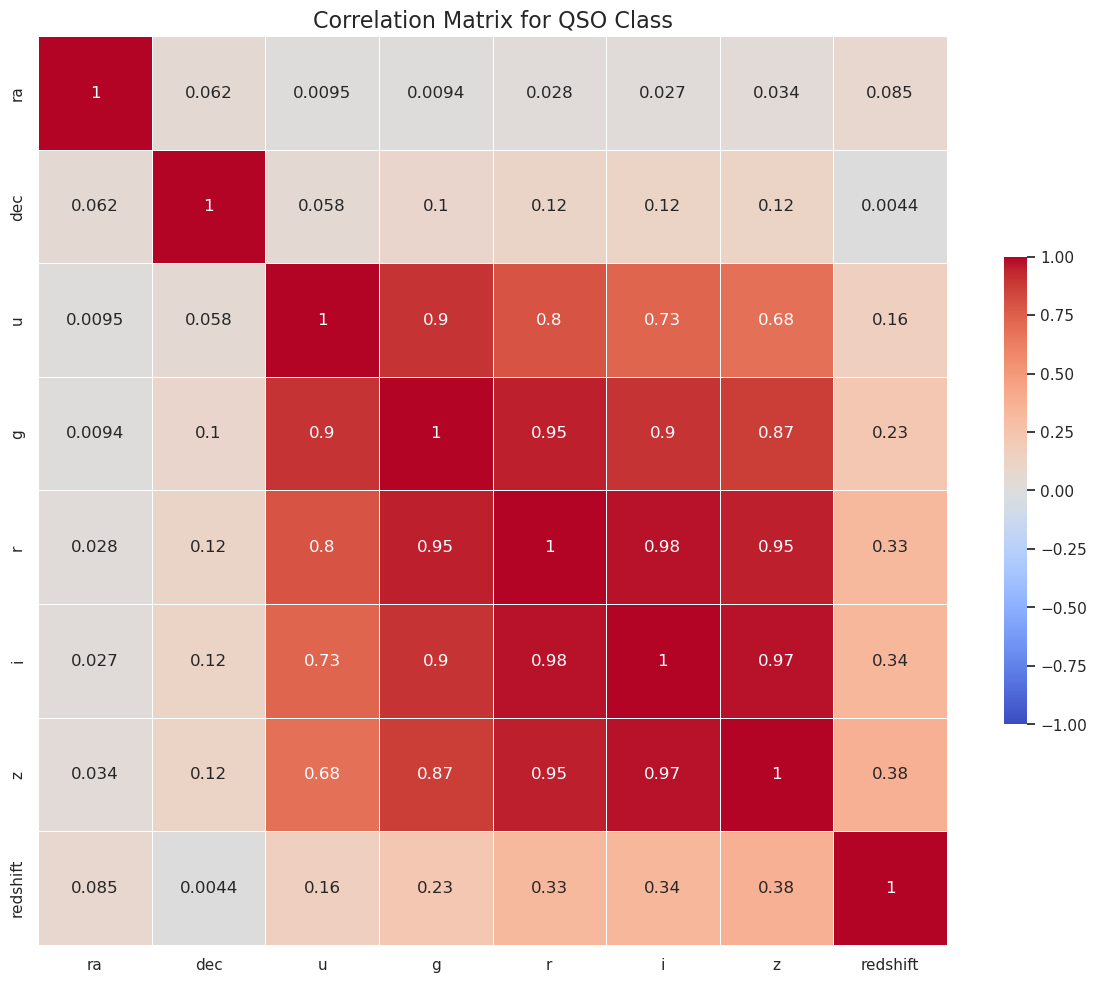

In [88]:
# Create heatmaps for each class
plot_correlation_heatmap(star_correlation_matrix, 'Correlation Matrix for STAR Class') # Heatmap for STAR class
plot_correlation_heatmap(galaxy_correlation_matrix, 'Correlation Matrix for GALAXY Class') # Heatmap for GALAXY class
plot_correlation_heatmap(qso_correlation_matrix, 'Correlation Matrix for QSO Class') # Heatmap for QSO class

**Task: Can you comment on groups of observations that can be grouped together or that appear independent from each other given these correlations, and if there is any difference between the three celestial objects? (**1 point**)**

### Answer:
#### **1. STAR Class**
    - Strong Positive Correlations

There are strong positive correlations among u, g, r, i, and z magnitudes. It means when one magnitude rises, the others also tend to increase, reflecting the overall brightness of the star across different wavelengths.

    - Independent Features
    
Features like run ID, rerun ID, cam col, field ID, spec obj ID, plate, MJD, and fiber ID have very little correlation with other features or each other. This is expected because they are mostly identification or observational parameters rather than inherent properties of the stars.

    - Unique Observations

The redshift has very weak correlations with other features in the STAR class, which is typical for nearby stars.

#### **2. GALAXY Class**

    - Moderate Correlations

Similar to the STAR class, there are positive correlations among u, g, r, i, and z magnitudes, but these correlations are slightly weaker than what's in the STAR class.

    - Weak Correlations
The redshift shows weak ~ moderate correlations with magnitude features (u, g, r, i, z) in galaxies. It indicates the relationship between a galaxy's distance and its apparent brightness.

    - Independent Features

Same as the STAR class, features like run ID, rerun ID, cam col, field ID, spec obj ID, plate, MJD, and fiber ID have very little correlation with other features.

#### **3. QSO Class**

    - Weak Overall Correlations

Correlations among u, g, r, i, and z magnitudes exist but are clearly weaker than the STAR and GALAXY classes.

    - Unique Observations

The redshift has very weak correlations with other features. Usually, there are high redshifts of quasars.

    - Independent Features

Similar to STAR and GALAXY classes.

#### **4. Differences Between Celestial Objects:**

- The STAR class has the strongest correlations among magnitude features (u, g, r, i, z).

- The GALAXY class shows moderate correlations in magnitudes.

- The QSO class has the weakest correlations in magnitude features.

#### **5. Redshift Behavior:**

- In the STAR class, redshift is largely uncorrelated with other features.

- The GALAXY class shows weak to moderate correlations between redshift and magnitudes.

- The QSO class, surprisingly, shows very weak correlations between redshift and other features.

#### **6. Overall Correlation Patterns:**

- The STAR class shows the most prominent correlation patterns.

- The GALAXY class shows moderate correlation patterns.

- The QSO class has the weakest overall correlation patterns.

### 1.5 Data exploration
Given the structure of the correlations, we will explore the values of the data.

#### 1.5.a. Distributions of redshift
"redshifting" happens when the source of light is becoming more distant to the receiver: the object is moving away from Earth. 

**Task: plot histograms for the 'redshift' feature column for each class (1 point).**

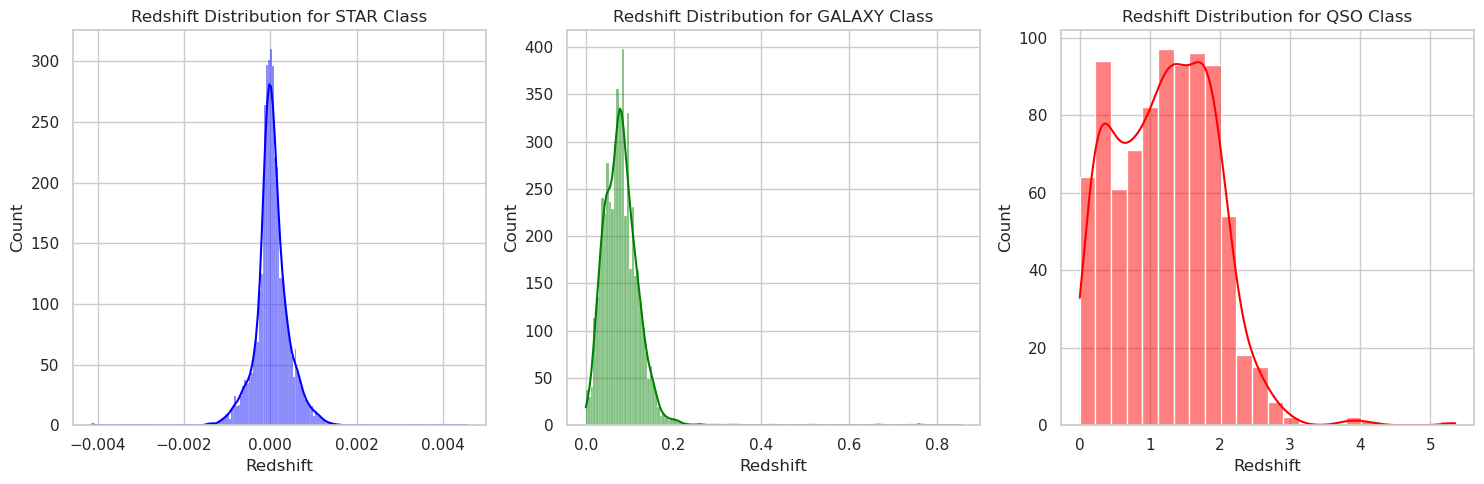

In [89]:
# Create a figure with 3 subplots
plt.figure(figsize=(15, 5))

# Plot histogram for STAR class
plt.subplot(1, 3, 1)
sns.histplot(data=star_df, x='redshift', kde=True, color='blue')
plt.title('Redshift Distribution for STAR Class')
plt.xlabel('Redshift')
plt.ylabel('Count')

# Plot histogram for GALAXY class
plt.subplot(1, 3, 2)
sns.histplot(data=galaxy_df, x='redshift', kde=True, color='green')
plt.title('Redshift Distribution for GALAXY Class')
plt.xlabel('Redshift')
plt.ylabel('Count')

# Plot histogram for QSO class
plt.subplot(1, 3, 3)
sns.histplot(data=qso_df, x='redshift', kde=True, color='red')
plt.title('Redshift Distribution for QSO Class')
plt.xlabel('Redshift')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Task : Describe briefly the difference between the three histograms. (0.5 point)**

<!-- # answer -->
* **Star:** 
    - The redshift values for stars are concentrated extremely close to zero, with a range approximately from ~ -0.002 to 0.002.
    - The distribution shows a very sharp, narrow peak centered near zero.
    - There's a very high frequency of stars with redshift values close to zero, with a rapid drop-off as redshift increases.

* **Galaxy:** 
    - The redshift values for galaxies span a wider range, approximately from ~ 0 to 0.2.
    - The distribution has a broader, a little bit more bell-shaped curve compared to Star.
    - The peak of the distribution is shifted slightly to the right of zero, around 0.1.
    - There's a significant spread of redshift values, with a gradual tapering towards higher redshifts.


* **QSO:** 
    - Quasars show the widest range of redshift values, extending from about ~ 0 to beyond 5.0.
    - The distribution is much flatter and more spread out compared to Stars and Galaxy.
    - There are multiple smaller peaks visible in the distribution, suggesting different populations of quasars at various distances.
    - The overall frequency is lower than Star or Galaxie, but more evenly distributed across a wide range of redshifts.


* **Range of Redshifts:**

    - Stars: Narrowest (≈0-0.005)

    - Galaxies: Moderate (≈0-0.4)

    - QSOs: Widest (≈0-5+)

* **Distribution Shape:**

    - Stars: Very sharp, narrow peak

    - Galaxies: Broader, roughly bell-shaped

    - QSOs: Flat, spread out with multiple smaller peaks

* **Peak Positions:**

    - Stars: Extremely close to zero

    - Galaxies: Slightly above zero (around 0.1)

    - QSOs: Multiple peaks at various redshifts

* **Frequency Distribution:**

    - Stars: Highest frequency near zero, rapid drop-off

    - Galaxies: Moderate frequency, gradual decrease

    - QSOs: Lower overall frequency, more evenly distributed across range

#### 1.5.b. Right ascension (ra) and declination (dec) 

We will now plot the right ascension versus the declination depending on the class. You can use the ``lmplot`` function in ``seaborn`` (https://seaborn.pydata.org/generated/seaborn.lmplot.html) to represent the sky view of these objects.

<Figure size 1000x500 with 0 Axes>

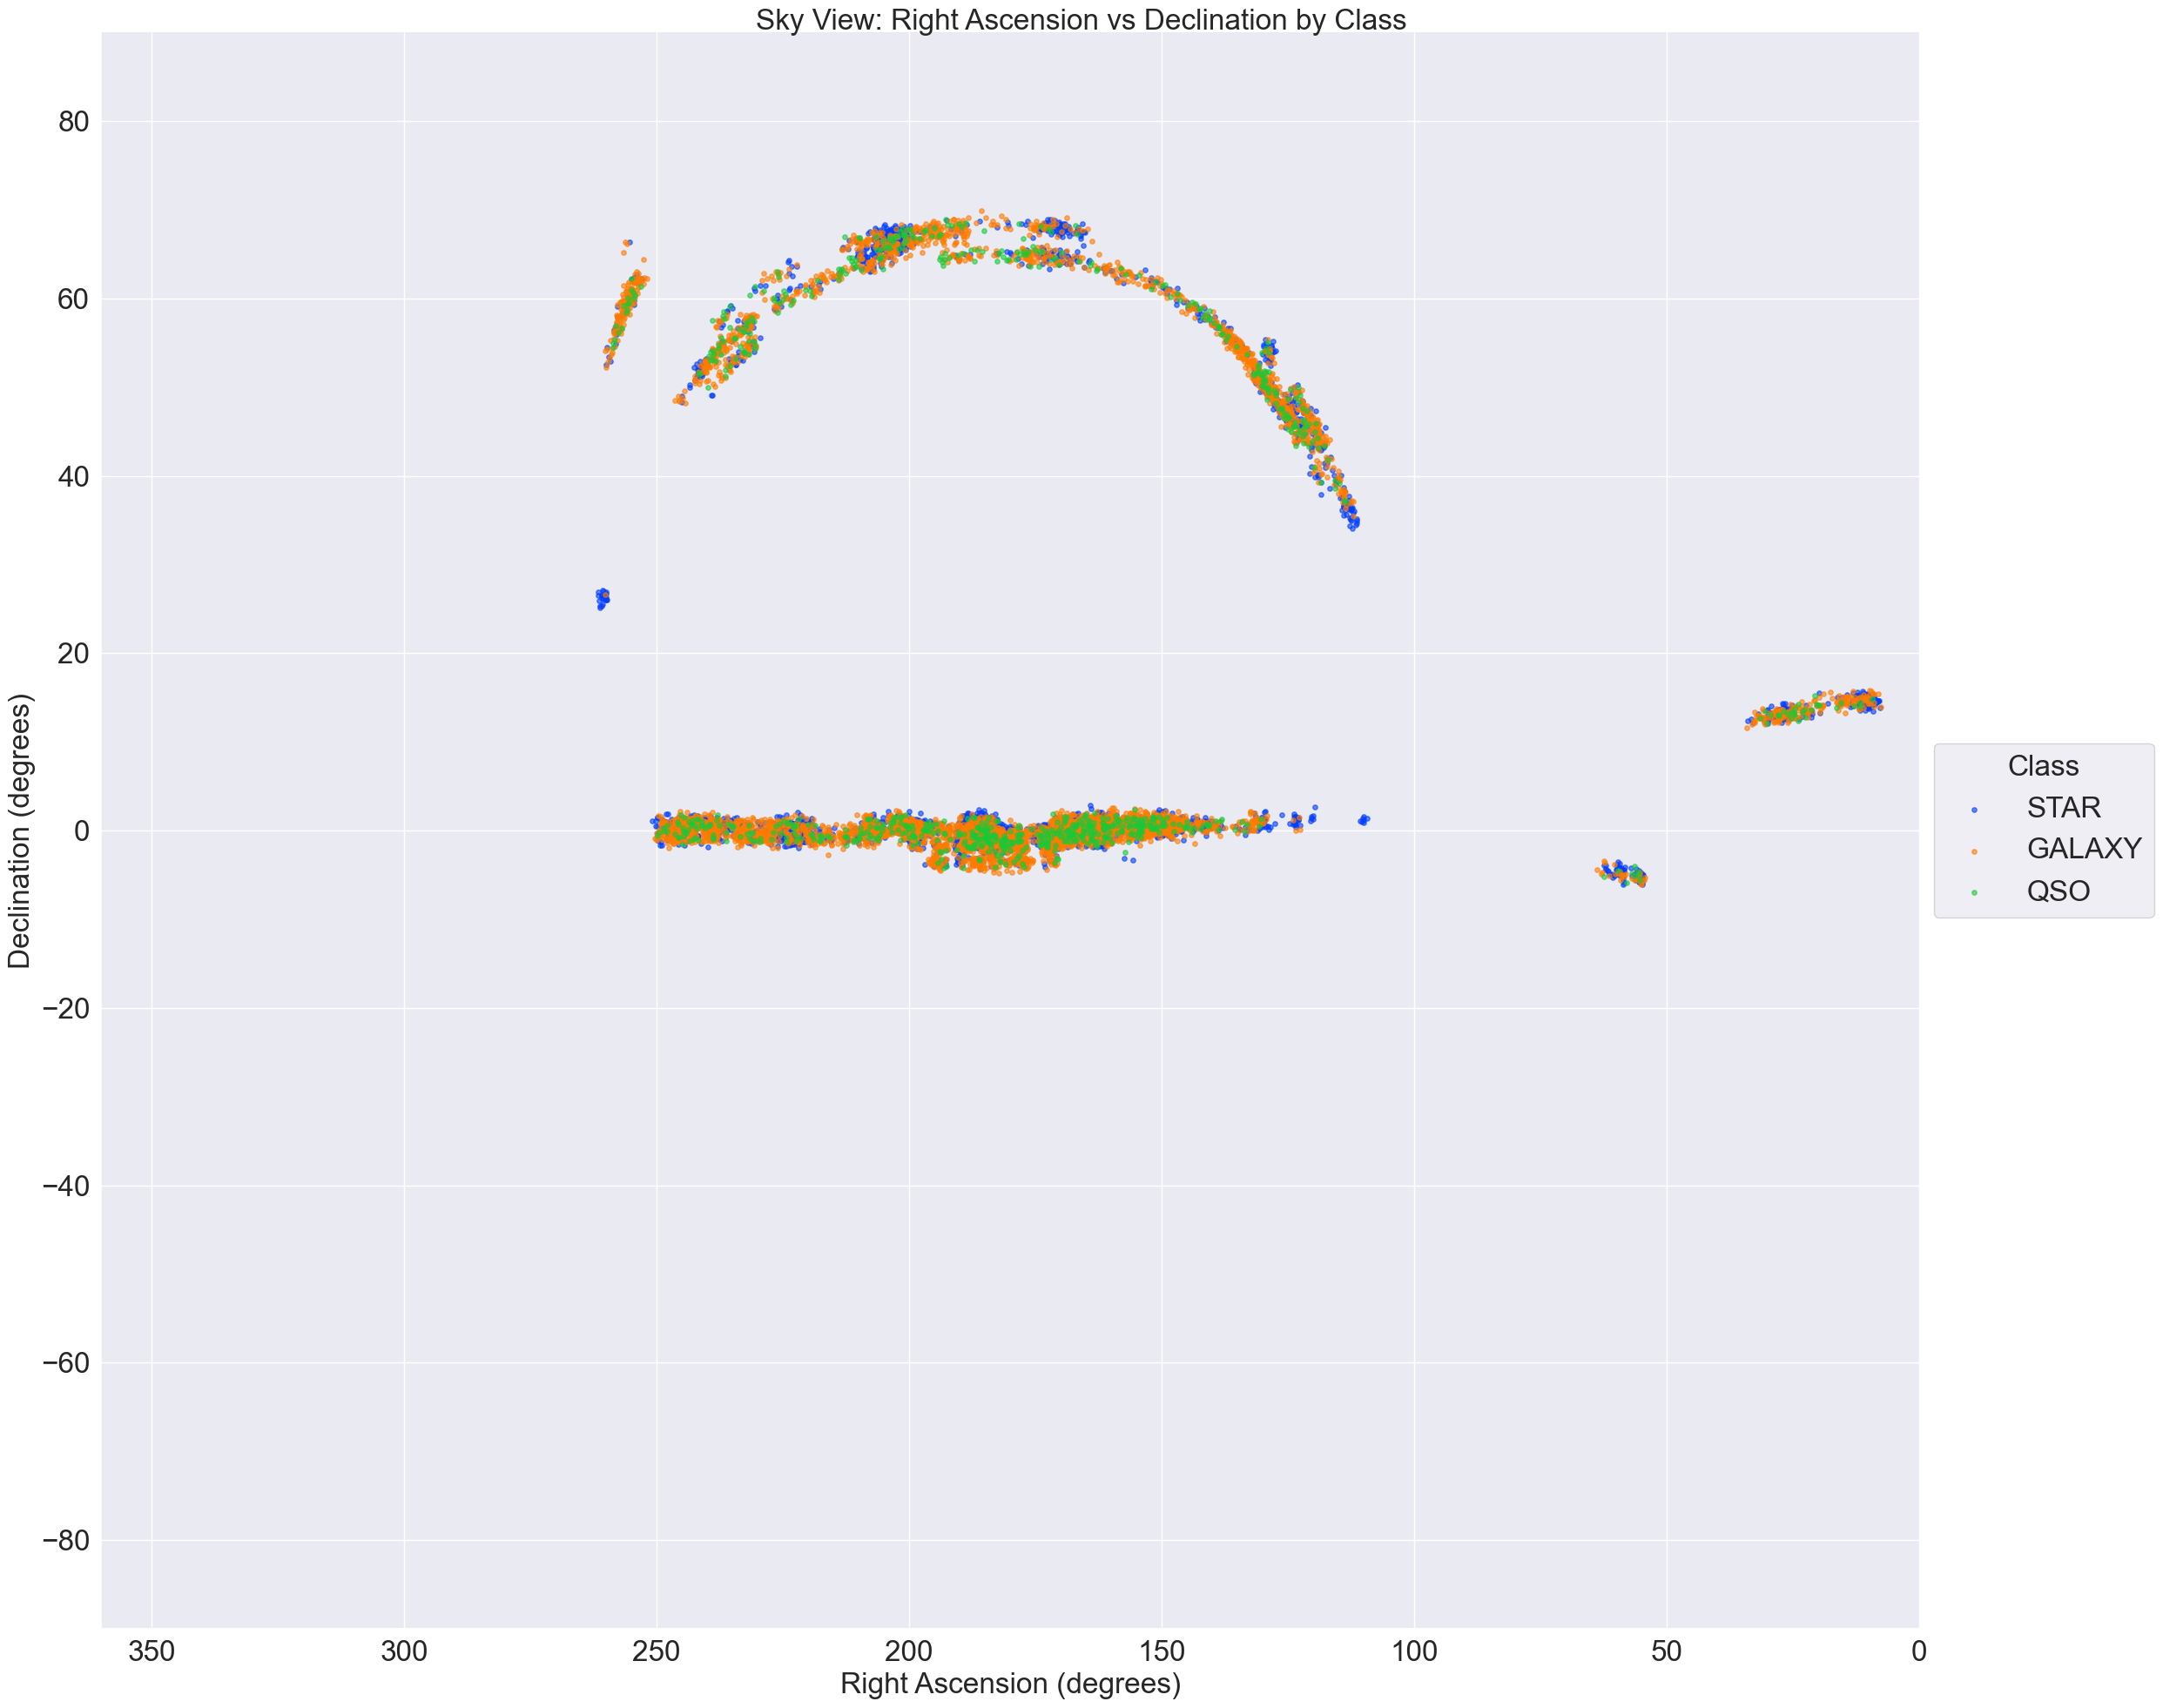

In [90]:
# Set the style for the plot
sns.set_style("darkgrid")

# Add small random jitter to RA and Dec to separate overlapping points
df['ra_jitter'] = df['ra'] + np.random.normal(0, 0.5, len(df))
df['dec_jitter'] = df['dec'] + np.random.normal(0, 0.5, len(df))

# Create the plot using lmplot
plt.figure(figsize=(10, 5))
g = sns.lmplot(data=df, x='ra_jitter', y='dec_jitter', hue='class', fit_reg=False, height=20, aspect=1.25, palette='bright',
               scatter_kws={'alpha': 0.6, 's':15},legend=False)

# Customize the plot
g.figure.suptitle('Sky View: Right Ascension vs Declination by Class', fontsize=24)
g.set_axis_labels("Right Ascension (degrees)", "Declination (degrees)", fontsize=24)

# Invert the x-axis to match astronomical convention
plt.gca().invert_xaxis()

# Adjust the plot limits to show the full range of RA and Dec
plt.xlim(360, 0)  # RA goes from 0 to 360 degrees
plt.ylim(-90, 90)  # Dec goes from -90 to +90 degrees

# Add a legend with a title
plt.legend(title='Class', title_fontsize='24', fontsize='24', loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust tick label size
plt.tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout()
plt.show()

**Task: do you see any obvious differences such that one could easily discriminate between the two coordinates? (0.5 point)**

####  Answer:
There are no obvious differences that would allow easy discrimination between the two coordinates (right ascension and declination). The plot shows a fairly uniform distribution of points across both axes, no clear cut-offs or density variations in either coordinate, the three distinct colors representing different classes, but they are evenly distributed across both coordinates.

#### 1.5.c Filters - u,g,r,i,z 

Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations. According to the correlation matrix, they are correlated for all three classes.

Therefore it is interesting to see that band 'u' is less correlated to the other bands. 

**Task Plot histograms and discuss why you expect these features to be correlated (1 points)**

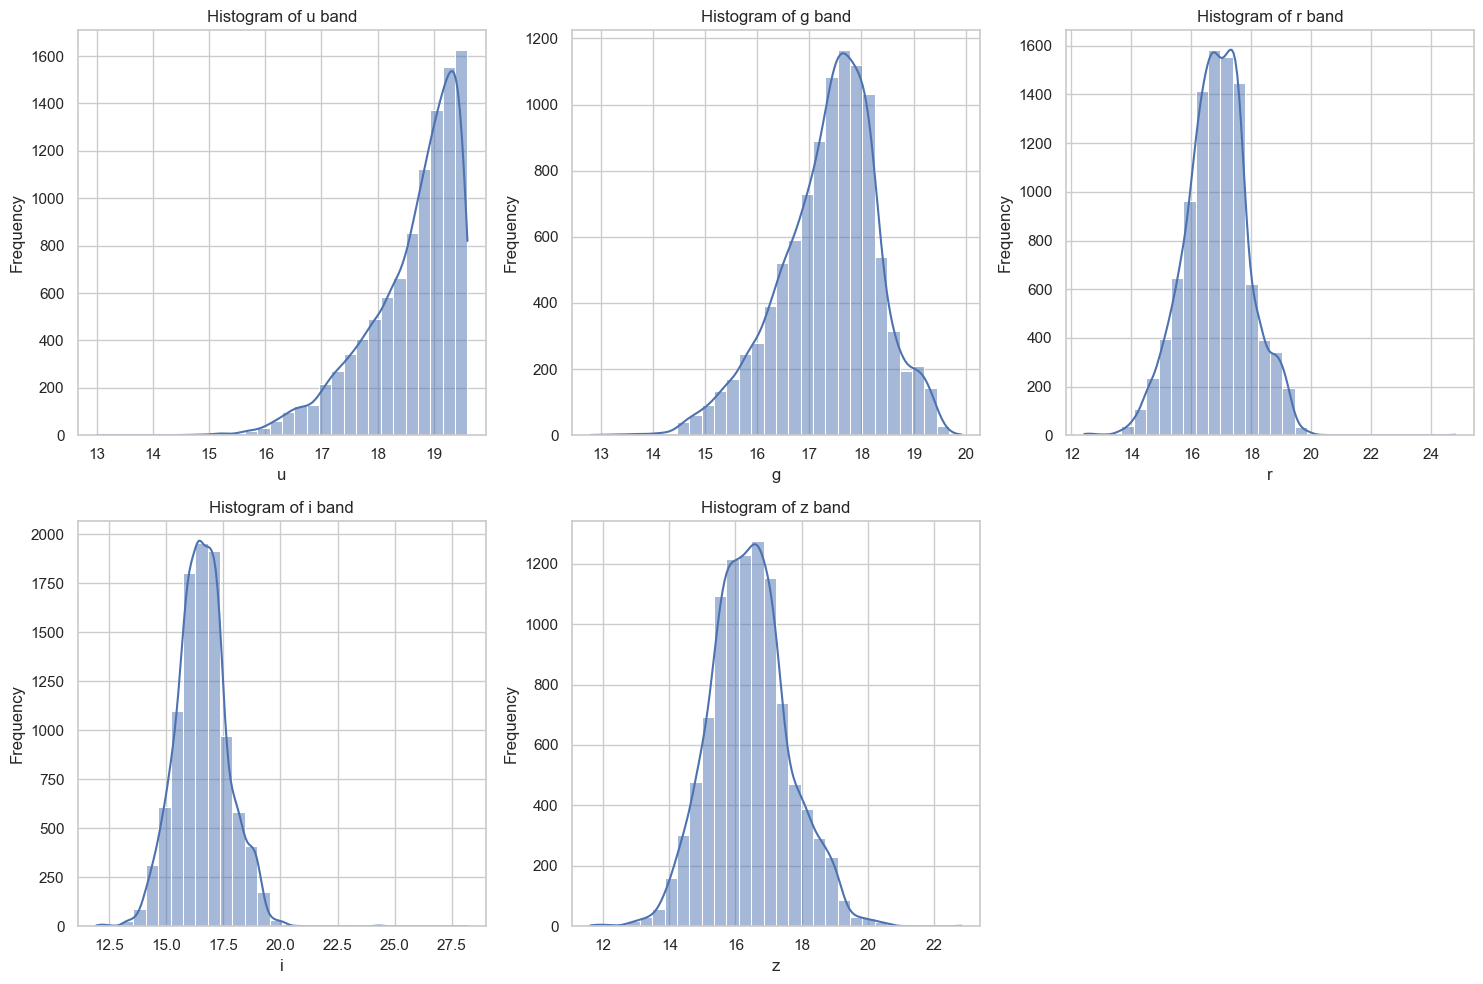

In [91]:
# Set the style for the plot
sns.set_theme(style="whitegrid")

# Create histograms for each band
bands = ['u', 'g', 'r', 'i', 'z']

# Create a figure with 6 subplots
plt.figure(figsize=(15, 10))

for i, band in enumerate(bands):
    plt.subplot(2, 3, i+1) # Select the next subplot
    sns.histplot(df[band], bins=30, kde=True) # Plot a histogram
    plt.title(f'Histogram of {band} band') # Set the title
    plt.xlabel(band) # Set the x-axis label
    plt.ylabel('Frequency') # Set the y-axis label

plt.tight_layout()
plt.show()

## I expect these featuers to be correlated because the different bands represent measurements taken at various wavelengths of light. 
# In general, light captured in similar wavelengths will exhibit similarities due to processes like scattering and absorption that
# affect light similarly across close-range wavelengths. Features like color, brightness, and composition of astronomical objects
# can influence measurements across the bands. For instance, two nearby wavelengths can yield similar data as they tend to interact with
# the same physical phenomena.

<!-- Anwer: -->

### 1.6 Data Dimensionality Reduction
At this point, we are left with 8 features: redshift, u, g, r, i, z, ra, and dec. Among these, the filters (u, g, r, i, z) are correlated to each other. There is therefore a potential for reducing the dimensions of the features using PCA on these 5 features.

We will use the skilearn function ``sklearn.decomposition.PCA()`` to fit and transform the data into the PC coordinates. Lets' first explore how many PCs we need. Fit the PCA function over the total number of filters. You will fit the PCA function over an array with the columns selected from the dataframe. 

**Task: Perform the PCA over a max number of PCs, output the explained variance ratio values, decide on an appropriate maximum number of PC to use (6 points)**

Explained Variance Ratios:
[0.90265505 0.08753264 0.00458021 0.0040977  0.0011344 ]


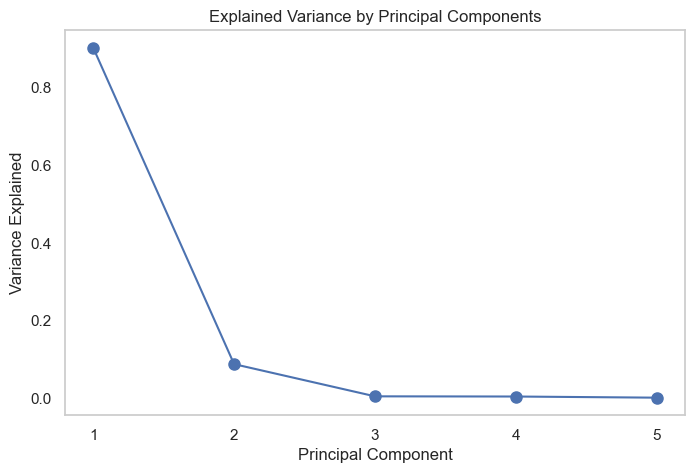

Cumulative Explained Variance:
[0.90265505 0.99018769 0.9947679  0.9988656  1.        ]
Optimal number of Principal Components to keep: 2


In [92]:
from sklearn.decomposition import PCA # Import PCA

# Select the relevant features (filters)
features = df[['u', 'g', 'r', 'i', 'z']]

# Create a PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(features)

# Get the explained variance ratios and print them
explainedvariance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:")
print(explainedvariance_ratio)

# Create a figure
plt.figure(figsize=(8, 5))

# Plot the explained variance ratios
plt.plot(range(1, len(explainedvariance_ratio) + 1), explainedvariance_ratio, marker='o', markersize=8)

# Add title and labels,adjust ticks and grid
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explainedvariance_ratio) + 1))
plt.grid()

plt.show()

# Calculate the cumulative explained variance and print it
cumulative_variance = explainedvariance_ratio.cumsum()
print("Cumulative Explained Variance:")
print(cumulative_variance)

# Find the optimal number of Principal Components to keep and print it
optimal_num_of_pcs = (cumulative_variance < 0.95).sum() + 1
print("Optimal number of Principal Components to keep:", optimal_num_of_pcs)

*Answer on how many PCs to use*
- Use the first two PCs, because they capture approximately ~99.02% of the variance, which is usually sufficient for most analysis.

We will now re-perform PCA with the number of PCs you found is most appropriate. Re-apply the fit-transform function. Update the dataframe by adding the PCA value(s) and dropping the columns of the 5 filter features.

**Task: PCA again, fit and transform, update the dataframe with the new feature(s) (3 points)**

In [93]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Drop the filter features
df_reduced = df.drop(columns=features)

# Encode the 'class' column
label_encoder = LabelEncoder()
df_reduced['class'] = label_encoder.fit_transform(df_reduced['class'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_reduced)

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

# Concatenate PCA results to the original DataFrame
updated_df = pd.concat([df, pca_df], axis=1)

# Display the updated DataFrame
print(updated_df)

              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       class  redshift   ra

## 2. Unsupervised Clustering with KMeans (20 points)

In this section, we will explore if the data features will be sufficient for classification. As a first exploration, we will perform unsupervised classification with Kmeans clustering.

## 2.1 Perform preliminary Kmeans (10 points)

Implement Kmeans here for a given number of clusters and on the features of interest. Choose 3 features.
* Use ``sklearn`` to perform Kmeans.
* Repeat Kmeans and discuss (in a markdown cell) the stability of clustering (e.g., use visualization to qualitatively assess the stability).


In [94]:
# import the necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, homogeneity_score, completeness_score, fowlkes_mallows_score
from mpl_toolkits.mplot3d import Axes3D

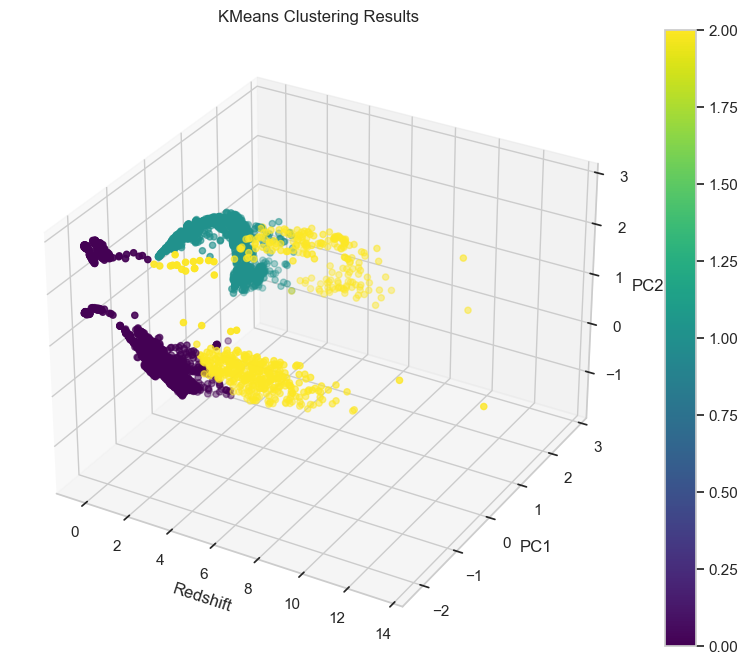

In [95]:
# Choosing features ['redshift', 'PC1', 'PC2'] based on their relevance, 
# ability to reduce complexity while maintaining information, 
# and their potential for providing a clear understanding of the model performance at the outset.
features = ['redshift', 'PC1', 'PC2']
X = updated_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans for a given number of clusters (3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualize the clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # Create a 3D plot
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=cluster_labels, cmap='viridis')

# Add labels and title
ax.set_xlabel('Redshift')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
plt.title('KMeans Clustering Results')

# Add a colorbar
plt.colorbar(scatter)
plt.show()

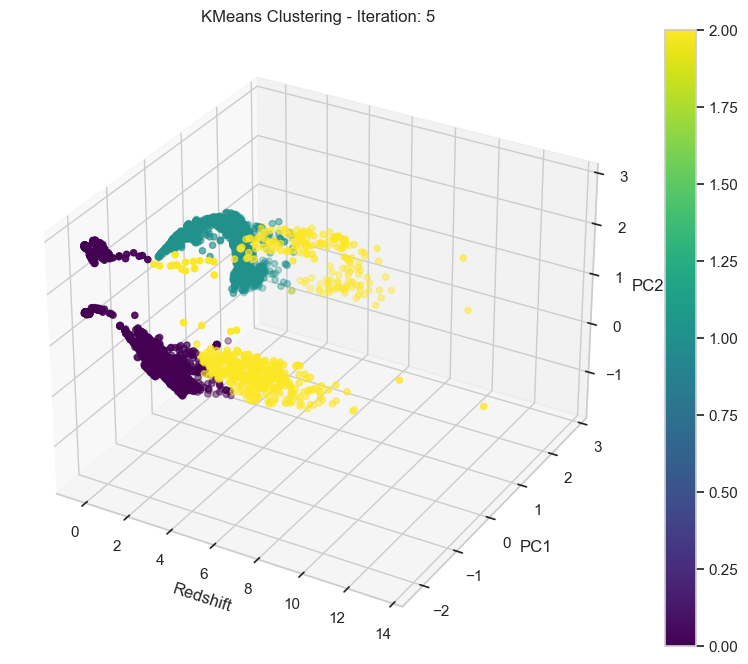

In [96]:
# Repeat KMeans and assess stability
n_repeats = 5
for i in range(n_repeats):
    kmeans = KMeans(n_clusters=n_clusters, random_state=i, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

# Visualize the clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # Create a 3D plot
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis')

# Add labels and title
ax.set_xlabel('Redshift')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
plt.title(f'KMeans Clustering - Iteration: {i+1}')

# Add colorbar
plt.colorbar(scatter)
plt.show()

## 2.2 Find the optimal number of clusters (5 points)

Use a method to establish the optimal number of clusters.

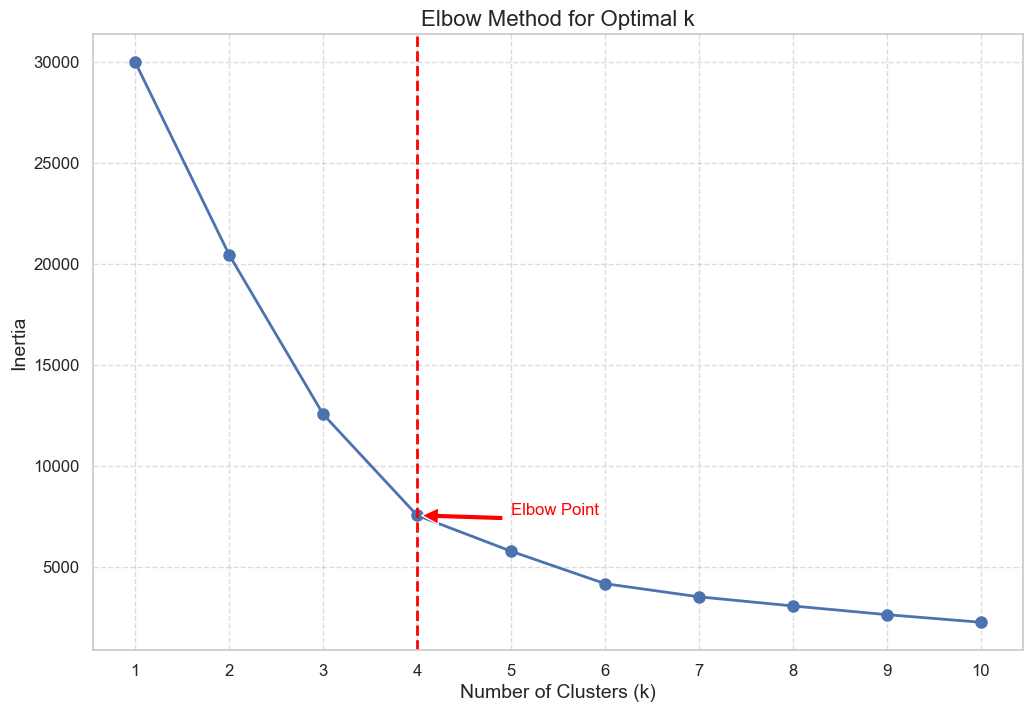

In [97]:
# Determine optimal number of clusters using the elbow method, beacuse it can provide a visual representation of the relationship 
# between the number of clusters and the total within-cluster sum of squares (WCSS).

inertias = [] # List to store inertias
k_range = range(1, 11) # Range of k values

# Perform KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


# Plot the elbow curve
plt.figure(figsize=(12, 8))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)

# Add labels and title, adjust ticks and grid
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xticks(k_range, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight the elbow point
elbow_point = 4  # observed elbow point
plt.axvline(x=elbow_point, color='red', linestyle='--', linewidth=2) # Add a vertical line at the elbow point
plt.annotate('Elbow Point', xy=(elbow_point, inertias[elbow_point-1]), # Annotate the elbow point
             xytext=(elbow_point+1, inertias[elbow_point-1]),
             fontsize=12, color='red',
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

## 2.3 Discuss performance of clustering ( 5 points)

1. Perform silhouette analysis (silhouette visualization and score)

The average silhouette score is: 0.6461


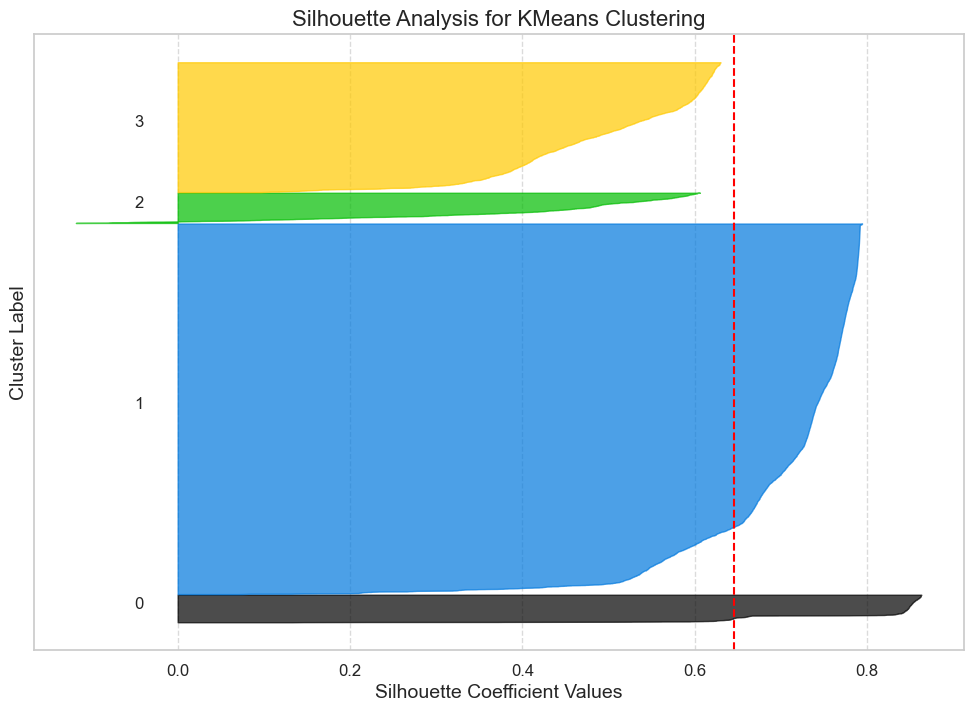

In [98]:
# Perform silhouette analysis using the optimal number of clusters
n_clusters_optimal = 4  # Identified optimal number of clusters
kmeans_optimal = KMeans(n_clusters=n_clusters_optimal, random_state=42, n_init=10)
cluster_labels_optimal = kmeans_optimal.fit_predict(X_scaled)

# Calculate the average silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels_optimal)
print(f"The average silhouette score is: {silhouette_avg:.4f}")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels_optimal)

# Plot the silhouette analysis
plt.figure(figsize=(12, 8))
y_lower = 10 # Set the initial y value
for i in range(n_clusters_optimal): # Iterate over the clusters
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_optimal == i] # Get the silhouette values
    ith_cluster_silhouette_values.sort() # Sort the values
    size_cluster_i = ith_cluster_silhouette_values.shape[0] # Get the size of the cluster
    y_upper = y_lower + size_cluster_i # Set the y value for the cluster
    color = plt.cm.nipy_spectral(float(i) / n_clusters_optimal) # Set color for each cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, # Fill the silhouette plot
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=12) # Add cluster labels
    y_lower = y_upper + 10 # Add 10 for the next cluster

# Add labels and title, adjust ticks and grid
plt.title("Silhouette Analysis for KMeans Clustering", fontsize=16)
plt.xlabel("Silhouette Coefficient Values", fontsize=14)
plt.ylabel("Cluster Label", fontsize=14)
plt.yticks([]) # Clear the y-axis labels
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add a vertical line for the average silhouette score
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

2. Calculate (python cell) and discuss (net markdown cell) homogeneity with respect to the ground truth labels using 3 appropriate metrics.

In [99]:
# Calculate Homogeneity, Completeness, and Fowlkes-Mallows Scores
true_labels = updated_df['class'] # True labels

# Calculate the metrics
homogeneity = homogeneity_score(true_labels, cluster_labels_optimal)
completeness = completeness_score(true_labels, cluster_labels_optimal)
fowlkes_mallows = fowlkes_mallows_score(true_labels, cluster_labels_optimal)

# Print the scores
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Fowlkes-Mallows Score: {fowlkes_mallows:.4f}")

Homogeneity Score: 0.1737
Completeness Score: 0.1743
Fowlkes-Mallows Score: 0.5180


**Question:**
After performing KMeans clustering and calculating the completeness, homogeneity, and Fowlkes-Mallows scores, how can you determine if these scores are good? Compare the obtained scores to the ideal values and explain what each score indicates about the clustering quality. What do you find from your results?

##### **Analysis of Clustering Metrics**

Homogeneity Score: 0.1737

- The homogeneity score measures how well each cluster contains only members of a single class. The score ranges from 0 to 1, with 1 being perfect homogeneity.

- The low score of 0.1737 indicates poor homogeneity. This suggests that the clusters formed by the KMeans algorithm contain a mix of different classes rather than being composed of a single class. In other words, the clustering does not align well with the ground truth labels.

Completeness Score: 0.1743

- The completeness score measures the extent to which all members of a given class are assigned to the same cluster, ranges from 0 to 1.

- The low completeness score of 0.1743 indicates that members of the same class are spread across different clusters rather than being grouped together. This suggests that the clustering algorithm is not effectively capturing the true class structure of the data.

Fowlkes-Mallows Score: 0.5180

- The Fowlkes-Mallows score is the geometric mean of precision and recall. It ranges from 0 to 1, with 1 indicating perfect agreement between the clustering and the true labels.

- The score of 0.5180 suggests moderate agreement between the clustering results and the true class labels. While it's higher than the homogeneity and completeness scores, it still indicates that there's considerable room for improvement in the clustering quality.

Average Silhouette Score: 0.6461

- The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.

- An average silhouette score of 0.6461 suggests relatively well-defined clusters. This score indicates that, on average, the data points are well-matched to their own clusters and poorly-matched to neighboring clusters.

Overall:

- Ideal values for homogeneity, completeness, and Fowlkes-Mallows scores are close to 1.0.
- For the silhouette score, values above 0.5 are generally considered good.
- The homogeneity (0.1737) and completeness (0.1743) scores are significantly lower than the ideal value of 1.0. These low scores indicate poor clustering quality with respect to the true class labels.
- The Fowlkes-Mallows score (0.5180) is moderate, suggesting some level of agreement between the clustering and true labels, but still far from ideal.
- The average silhouette score (0.6461) is the only metric showing good performance, indicating that the clusters are relatively well-separated in the feature space.
- This could indicate that the chosen features or the number of clusters may not be optimal for capturing the true class distinctions in the data. 

## 3 Machine Learning Models (30 points)

We will now train different models on this dataset. We have a total of 8 features, 3 classes, and 10,000 samples. We will use K-Nearest Neighbors, Naive Bayes, Random Forest, Support Vector Machine, Multi Layer Perceptron.

We now follow a normal machine learning workflow:
* Feature scaling (3) points)
* Train/test set split (2 points)
* Model design, training, testing (15 points)
* Model comparisons, pick your winner, discuss feature importance using Random Forest. (10 points)

### 3.1 Feature Scaling
Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster. You can scale the features only by dropping the "class" column without modifying the dataframe in place, using the pandas function ``drop()``.

**Task: Scale just the features (3 points)**

In [100]:
# Import the necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [101]:
# Drop the 'class' column and scale the features
features_df = df.drop(columns=['class'])
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_df.columns)

### 3.2 Test, train, validation data sets.
**Task: Split the data into a training and a test part.  (2 points)**

The models will be trained on the training data set and tested on the test data set

In [102]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, updated_df['class'], test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8000, 10)
Testing set shape: (2000, 10)


Computation time is important to account for when scaling up the data set and the model size. You can evaluate the relative computational time using the function ``time.perf_counter()`` to evaluate the absolute time. Then compare the computational time by making the difference between two time stamps:

``t1=time.perf_counter()``

``t2=time.perf_counter()``

``tcomp = t2 - t1``

We will also assess the model performance of these multi-class classifiers. We will evaluate the average of the scores over the 3 class labels.

In [103]:
# Import the necessary libraries
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,precision_score, recall_score, f1_score, accuracy_score

In the following, we will be testing over several classifiers. Follow the steps:
1. model definition/design
2. training
3. prediction on test
4. evaluation: a) print the classification_report; b) save the precision, recall, fscore and accuracy in variables

### 3.3.a K Nearest Neighbors (3 points)
Check out the function arguments and definition here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [149]:
# Model definition
knn = KNeighborsClassifier(n_neighbors=5)

# Training
t1 = time.perf_counter()
knn.fit(X_train, y_train)
t2 = time.perf_counter()
train_time = t2 - t1

# Prediction
t1 = time.perf_counter()
y_pred = knn.predict(X_test)
t2 = time.perf_counter()
pred_time = t2 - t1

# Evaluation
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred)) # Classification report
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {pred_time:.4f} seconds")

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.89      0.84      0.86       996
         QSO       0.98      0.92      0.95       190
        STAR       0.81      0.89      0.85       814

    accuracy                           0.87      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.87      0.87      0.87      2000

Accuracy: 0.8660
Training Time: 0.0359 seconds
Prediction Time: 0.1258 seconds


### 3.3.b Naive Bayes (3 points)
Check out the sklearn tutorial pages here: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes. We propose to use the Gaussian Naive Bayes.

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. For this example then we will use the unscaled data, then rescale it.

In [105]:
from sklearn.preprocessing import MaxAbsScaler # Import MaxAbsScaler

# Rescale the data using MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to retain feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Model definition
nb = GaussianNB()

# Training
t1 = time.perf_counter()
nb.fit(X_train_scaled_df, y_train) # Use DataFrame with feature names
t2 = time.perf_counter()
train_time = t2 - t1

# Prediction
t1 = time.perf_counter()
y_pred = nb.predict(X_test_scaled_df) # Use DataFrame with feature names
t2 = time.perf_counter()
pred_time = t2 - t1

# Evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred)) # Print classification report
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {pred_time:.4f} seconds")


Naive Bayes Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.97      0.98       996
         QSO       0.87      0.95      0.91       190
        STAR       0.99      0.99      0.99       814

    accuracy                           0.98      2000
   macro avg       0.95      0.97      0.96      2000
weighted avg       0.98      0.98      0.98      2000

Accuracy: 0.9775
Training Time: 0.0317 seconds
Prediction Time: 0.0033 seconds


### 3.3.c Random Forest Classifier (2 points)
Check out the tutorial page here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [106]:
# Model definition
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
t1 = time.perf_counter()
rf.fit(X_train, y_train)
t2 = time.perf_counter()
train_time = t2 - t1

# Prediction
t1 = time.perf_counter()
y_pred = rf.predict(X_test)
t2 = time.perf_counter()
pred_time = t2 - t1

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred)) # Display classification report
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {pred_time:.4f} seconds")

Random Forest Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       996
         QSO       0.98      0.95      0.97       190
        STAR       0.99      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Accuracy: 0.9915
Training Time: 2.9572 seconds
Prediction Time: 0.0441 seconds


### 3.3.d Support Vector Machine Classifier (2 points)
Check out the sklearn information page here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [107]:
# Model definition
svm = SVC(kernel='rbf', random_state=42)

# Training
t1 = time.perf_counter()
svm.fit(X_train, y_train)
t2 = time.perf_counter()
train_time = t2 - t1

# Prediction
t1 = time.perf_counter()
y_pred = svm.predict(X_test)
t2 = time.perf_counter()
pred_time = t2 - t1

# Evaluation
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred)) # Display classification report
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {pred_time:.4f} seconds")

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.95      0.87      0.91       996
         QSO       0.99      0.92      0.95       190
        STAR       0.86      0.96      0.91       814

    accuracy                           0.91      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.92      0.91      0.91      2000

Accuracy: 0.9135
Training Time: 2.5856 seconds
Prediction Time: 1.1954 seconds


### 3.3.e Multi-Layer Perceptron (3 points)

Check out the information page here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [108]:
# Model definition
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

# Training
t1 = time.perf_counter()
mlp.fit(X_train, y_train)
t2 = time.perf_counter()
train_time = t2 - t1

# Prediction
t1 = time.perf_counter()
y_pred = mlp.predict(X_test)
t2 = time.perf_counter()
pred_time = t2 - t1

# Evaluation
print("Multi-Layer Perceptron Classification Report:")
print(classification_report(y_test, y_pred)) # Display classification report
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {pred_time:.4f} seconds")

Multi-Layer Perceptron Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.98      0.99       996
         QSO       0.98      0.94      0.96       190
        STAR       0.98      1.00      0.99       814

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.98      0.98      2000

Accuracy: 0.9850
Training Time: 12.3029 seconds
Prediction Time: 0.0124 seconds


### 3.4 Model performance and comparison 

### 3.4.a Confusion Matrix and interpretation

**Task: Plot the confusion matrix (2 points)**

Use sklearn ``ConfusionMatrixDisplay" from the sklearn to visualize the confusion matrix

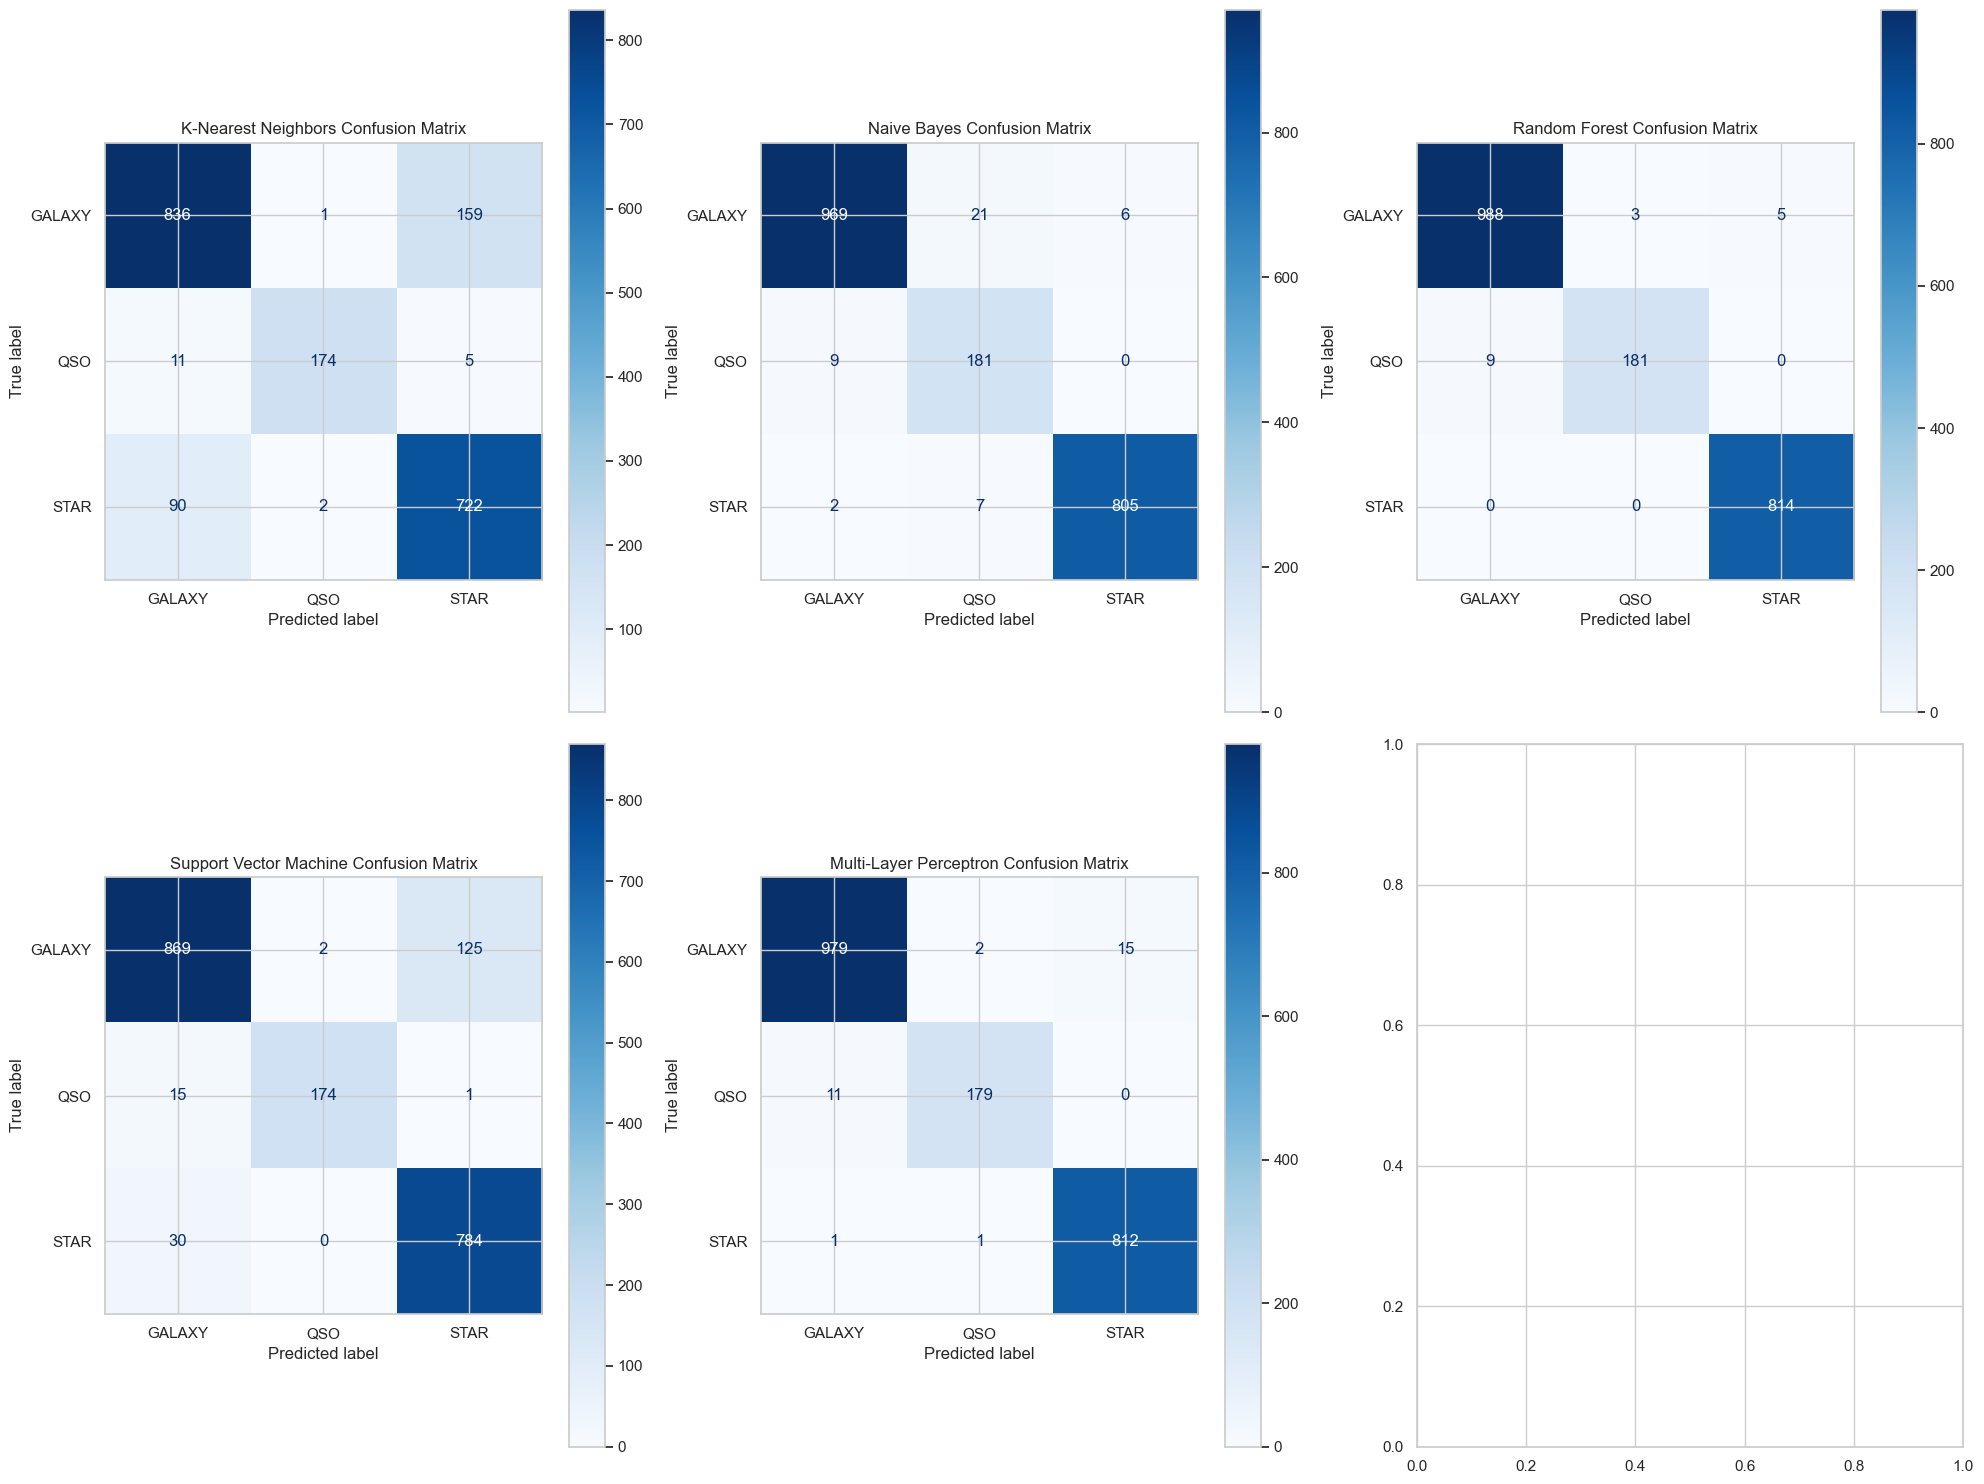

In [169]:
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# Dictionary of models used
models = {
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb,
    'Random Forest': rf,
    'Support Vector Machine': svm,
    'Multi-Layer Perceptron': mlp
}

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.ravel() # Flatten the axes
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axes[i], cmap=plt.cm.Blues)
    axes[i].set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()


**Task: Comment on what you see the best classifier is likely to be (1 point).** You can also comment on the misclassification and confusion rates.

##### **Answer:**
The Random Forest classifier may be the best classifier because it has the highest concentration of correct classifications along the diagonal,the least amount of off-diagonal elements, which indicating fewer misclassifications that is consistently performed across all three classes.

### 3.4.a K Fold Cross Validation
We will now perform k fold cross valdiation for the classifiers. We use the function ``cross_val_score`` on each ewstimator, on the training set, with 10 folds, and use accuracy as a score metric.

**Task: perform the cross validation over K folds, output the mean and standard deviation of the accuracy (3 points)**

In [170]:
from sklearn.model_selection import cross_val_score # Import cross_val_score

# Dictionary to store results
cv_results = {}

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    cv_results[name] = (np.mean(scores), np.std(scores))
    print(f"{name} - Mean Accuracy: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}")

K-Nearest Neighbors - Mean Accuracy: 0.8639, Std Dev: 0.0103
Naive Bayes - Mean Accuracy: 0.9788, Std Dev: 0.0052
Random Forest - Mean Accuracy: 0.9881, Std Dev: 0.0038
Support Vector Machine - Mean Accuracy: 0.9099, Std Dev: 0.0098
Multi-Layer Perceptron - Mean Accuracy: 0.9847, Std Dev: 0.0047


**Task: Which method won the Xval test (1 point) ?**

**Answer:**
The Random Forest Classifier (Mean Accuracy: 0.9881, Standard Deviation: 0.0038).

### 3.4.c And the winner is ...

Let's compare the results. 
**Task: Create a pandas dataframe with all of the performance metrics, including the results from K-fold cross validation. (2 points)**

In [171]:
# Create a list to store the results for each model
results = []

# List of model names
model_names = list(models.keys())

# List of model objects
models = list(models.values())

# Iterate through each model
for name, model in zip(model_names, models):
    # Get the predictions for the current model
    y_pred = model.predict(X_test)  
  
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Get cross-validation results
    cv_mean, cv_std = cv_results[name]

    # Calculate precision, recall, and f1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results to the list
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall,
                    'F1-Score': f1, 'CV Mean Accuracy': cv_mean,'CV Std Dev': cv_std
})

# Create the DataFrame
df_results = pd.DataFrame(results)

# Set 'Model' as the index
df_results.set_index('Model', inplace=True)

# Display the DataFrame
print(df_results)

                        Accuracy  Precision  Recall  F1-Score  \
Model                                                           
K-Nearest Neighbors       0.8660   0.869374  0.8660  0.866551   
Naive Bayes               0.9775   0.978672  0.9775  0.977857   
Random Forest             0.9915   0.991471  0.9915  0.991458   
Support Vector Machine    0.9135   0.918048  0.9135  0.913653   
Multi-Layer Perceptron    0.9850   0.985022  0.9850  0.984940   

                        CV Mean Accuracy  CV Std Dev  
Model                                                 
K-Nearest Neighbors             0.863875    0.010284  
Naive Bayes                     0.978750    0.005184  
Random Forest                   0.988125    0.003843  
Support Vector Machine          0.909875    0.009754  
Multi-Layer Perceptron          0.984750    0.004704  


**Task: Comment on the accuracy and performance and choose a winner. (1 point)**

see the cell below

<!-- answer here -->






## 4 Summary (4 points)

### 4.1 Feature Importance using Random Forest Classifier

Decision Trees have the unique property of being able to order features by their ability to split between the classes. If some features dominate over other in the predictive power of classes, one can further reduce the dimension of the features for additional analysis. The vector of feature importance is the module ``rfc.feature_importances_``, sorted with ascending importance. Store the vector of importance .

**Task: plot a bar plot using the function ``matplotlib.pyplot.bar``. (2 points)**

In [73]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
      feature  importance
7    redshift    0.751390
6           z    0.071572
5           i    0.062052
3           g    0.038052
2           u    0.034826
4           r    0.026777
0          ra    0.004182
8   ra_jitter    0.004143
1         dec    0.003736
9  dec_jitter    0.003271


**Task: What are the top three features (1 point)?**

**Answer:**
redshift, z, and i.

In this notebook, you have learned that redshift was the best predictor of what object you are observing. Now, did you actualy need to do this all to find this out? Probably not if you were an astrophysicist! But hey, we are not. So great job!

**Task: Briefly comment on what you have learned (1 point)**

see the cell below

<!-- answer -->